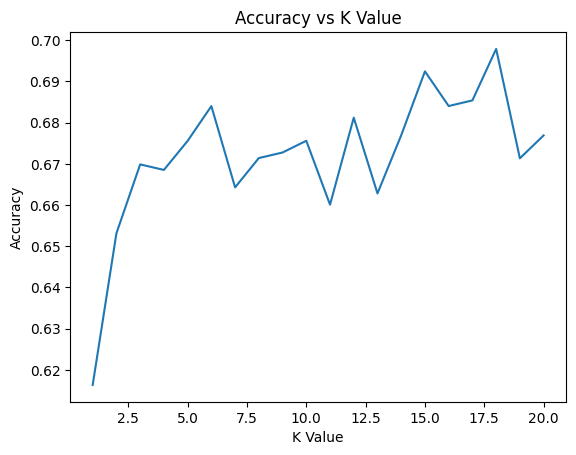

Best K value: 18
Mean accuracy across folds: 0.6840
Standard deviation of accuracy: 0.0410


array([[94, 16],
       [40, 29]])

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
df = pd.read_csv("train.csv")
# Load test data
df_test = pd.read_csv("test.csv")

# Feature selection and scaling
features = ["Age", "Fare"]
scaler = StandardScaler()
scaler.fit(df[features])
df_scaled = df.copy()
df_scaled[features] = scaler.transform(df[features])
# Impute missing values
imputer = SimpleImputer(strategy="mean")
df_scaled = df.copy()
df_scaled[features] = imputer.fit_transform(df[features])

# Split data
X = df_scaled[features]
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Determine the best K value
k_range = range(1, 21)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    kf = KFold(n_splits=5, shuffle=True)
    fold_scores = []
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)
        fold_scores.append(accuracy_score(y_test_fold, y_pred))
    scores.append(np.mean(fold_scores))

# Plot accuracy vs k
plt.plot(k_range, scores)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value")
plt.show()

# Best K value
best_k = k_range[np.argmax(scores)]
print(f"Best K value: {best_k}")

# 5-fold cross validation and performance evaluation
knn = KNeighborsClassifier(n_neighbors=best_k)
kf = KFold(n_splits=5, shuffle=True)
fold_accuracies = []
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    knn.fit(X_train_fold, y_train_fold)
    y_pred = knn.predict(X_test_fold)
    fold_accuracies.append(accuracy_score(y_test_fold, y_pred))

# Print results
print(f"Mean accuracy across folds: {np.mean(fold_accuracies):.4f}")
print(f"Standard deviation of accuracy: {np.std(fold_accuracies):.4f}")

# Confusion matrix
confusion_matrix(y_test, knn.predict(X_test))




The KNN model achieved an average accuracy of 68.4% with a standard deviation of 0.0410 across 5 folds, suggesting good generalizability. However, further analysis like analyzing the confusion matrix and tuning hyperparameters is recommended for a complete picture.